In [2]:
import palettable
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stat
from statsmodels.stats import multitest
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from lifelines import KaplanMeierFitter
# if running in Colab, import tutorial data
import sys
plt.rcParams["font.family"] = "arial"
from lifelines.statistics import logrank_test

In [3]:
clinical_data = pd.read_csv('TCGA_ClinicalData_Final.csv')
clinical_data

,Study ID,Sample.ID,Sample ID,Diagnosis Age,American Joint Committee on Cancer Metastasis Stage Code,Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code,Neoplasm Disease Stage American Joint Committee on Cancer Code,American Joint Committee on Cancer Publication Version Type,American Joint Committee on Cancer Tumor Stage Code,Brachytherapy first reference point administered total dose,...,Somatic Status,Staging System,Staging System.1,Surgery for positive margins,Surgery for positive margins other,Surgical procedure first,Tissue Source Site,TMB (nonsynonymous),Person Neoplasm Status,Tumor Disease Anatomic Site
0,brca_tcga_pub2015,TCGA-A1-A0SK,TCGA-A1-A0SK-01,54.0,M0,N0 (i-),Stage IIA,6th,T2,NaN,...,Matched,Sentinel lymph node biopsy plus axillary disse...,NaN,Other,surgical resection,Lumpectomy,A1,3.366667,NaN,Breast
1,brca_tcga_pub2015,TCGA-A1-A0SP,TCGA-A1-A0SP-01,40.0,M0,N0 (i-),Stage IIA,6th,T2,NaN,...,Matched,Axillary lymph node dissection alone,NaN,NaN,NaN,Lumpectomy,A1,1.366667,TUMOR FREE,Breast
2,brca_tcga_pub2015,TCGA-A2-A0CM,TCGA-A2-A0CM-01,40.0,M0,N0 (i-),Stage IIA,6th,T2,NaN,...,Matched,Sentinel node biopsy alone,NaN,NaN,NaN,Simple Mastectomy,A2,1.666667,WITH TUMOR,Breast
3,brca_tcga_pub2015,TCGA-A2-A0T0,TCGA-A2-A0T0-01,59.0,M0,N1,Stage IIB,6th,T2,NaN,...,Matched,Axillary lymph node dissection alone,NaN,NaN,NaN,Lumpectomy,A2,4.800000,TUMOR FREE,Breast
4,brca_tcga_pub2015,TCGA-A2-A0T2,TCGA-A2-A0T2-01,66.0,M1,N3,Stage IV,NaN,T3,NaN,...,Matched,Axillary lymph node dissection alone,NaN,NaN,NaN,Modified Radical Mastectomy,A2,1.466667,WITH TUMOR,Breast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,brca_tcga_pub2015,TCGA-C8-A1HN,TCGA-C8-A1HN-01,56.0,M0,N0,Stage IIA,6th,T2,NaN,...,Matched,Axillary lymph node dissection alone,NaN,NaN,NaN,Modified Radical Mastectomy,C8,1.266667,TUMOR FREE,Breast
814,brca_tcga_pub2015,TCGA-C8-A26W,TCGA-C8-A26W-01,58.0,M0,N1,Stage IIB,6th,T2,NaN,...,Matched,NaN,NaN,NaN,NaN,Modified Radical Mastectomy,C8,1.400000,TUMOR FREE,Breast
815,brca_tcga_pub2015,TCGA-D8-A1XA,TCGA-D8-A1XA-01,64.0,M0,N0,Stage IA,7th,T1c,% IHC,...,Matched,Sentinel node biopsy alone,NaN,NaN,NaN,Lumpectomy,D8,0.766667,TUMOR FREE,Breast
816,brca_tcga_pub2015,TCGA-E2-A105,TCGA-E2-A105-01,79.0,M0,N0 (i-),Stage IIA,6th,T2,Allred score 3 + 2 = 5,...,Matched,Sentinel node biopsy alone,NaN,NaN,NaN,Lumpectomy,E2,1.766667,TUMOR FREE,Breast


In [4]:
clinical_data.columns.to_list()

['Study ID',
 'Sample.ID',
 'Sample ID',
 'Diagnosis Age',
 'American Joint Committee on Cancer Metastasis Stage Code',
 'Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code',
 'Neoplasm Disease Stage American Joint Committee on Cancer Code',
 'American Joint Committee on Cancer Publication Version Type',
 'American Joint Committee on Cancer Tumor Stage Code',
 'Brachytherapy first reference point administered total dose',
 'Cancer Type',
 'Cancer Type Detailed',
 'Cent17 Copy Number',
 'Birth from Initial Pathologic Diagnosis Date',
 'Days to Sample Collection.',
 'Death from Initial Pathologic Diagnosis Date',
 'Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value',
 'Days to Last Followup',
 'Disease Free (Months)',
 'Disease Free Status',
 'Disease code',
 'ER positivity scale other',
 'ER positivity scale used',
 'ER Status By IHC',
 'ER Status IHC Percent Positive',
 'Ethnicity Category',
 'First surgical procedure other',
 'Form completion

In [5]:
er_pos_set = clinical_data[clinical_data['ER Status By IHC'] == 'Positive']
er_pos_set

,Study ID,Sample.ID,Sample ID,Diagnosis Age,American Joint Committee on Cancer Metastasis Stage Code,Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code,Neoplasm Disease Stage American Joint Committee on Cancer Code,American Joint Committee on Cancer Publication Version Type,American Joint Committee on Cancer Tumor Stage Code,Brachytherapy first reference point administered total dose,...,Somatic Status,Staging System,Staging System.1,Surgery for positive margins,Surgery for positive margins other,Surgical procedure first,Tissue Source Site,TMB (nonsynonymous),Person Neoplasm Status,Tumor Disease Anatomic Site
5,brca_tcga_pub2015,TCGA-A2-A0YF,TCGA-A2-A0YF-01,67.0,M0,N0 (i+),Stage I,6th,T1b,NaN,...,Matched,Sentinel node biopsy alone,NaN,NaN,NaN,Simple Mastectomy,A2,0.566667,TUMOR FREE,Breast
6,brca_tcga_pub2015,TCGA-A2-A0YH,TCGA-A2-A0YH-01,53.0,M0,N2a,Stage IIIA,NaN,T2,NaN,...,Matched,Axillary lymph node dissection alone,NaN,NaN,NaN,Lumpectomy,A2,2.200000,TUMOR FREE,Breast
7,brca_tcga_pub2015,TCGA-A8-A06N,TCGA-A8-A06N-01,66.0,M0,N0,Stage IIIB,6th,T4b,NaN,...,Matched,NaN,NaN,NaN,NaN,Other,A8,1.133333,TUMOR FREE,Breast
8,brca_tcga_pub2015,TCGA-A8-A07L,TCGA-A8-A07L-01,58.0,M0,N1a,Stage IIIA,6th,T3,NaN,...,Matched,NaN,NaN,NaN,NaN,Other,A8,2.933333,TUMOR FREE,Breast
9,brca_tcga_pub2015,TCGA-A8-A086,TCGA-A8-A086-01,59.0,M0,N1a,Stage IIA,6th,T1c,NaN,...,Matched,NaN,NaN,NaN,NaN,Other,A8,0.600000,TUMOR FREE,Breast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,brca_tcga_pub2015,TCGA-C8-A1HN,TCGA-C8-A1HN-01,56.0,M0,N0,Stage IIA,6th,T2,NaN,...,Matched,Axillary lymph node dissection alone,NaN,NaN,NaN,Modified Radical Mastectomy,C8,1.266667,TUMOR FREE,Breast
814,brca_tcga_pub2015,TCGA-C8-A26W,TCGA-C8-A26W-01,58.0,M0,N1,Stage IIB,6th,T2,NaN,...,Matched,NaN,NaN,NaN,NaN,Modified Radical Mastectomy,C8,1.400000,TUMOR FREE,Breast
815,brca_tcga_pub2015,TCGA-D8-A1XA,TCGA-D8-A1XA-01,64.0,M0,N0,Stage IA,7th,T1c,% IHC,...,Matched,Sentinel node biopsy alone,NaN,NaN,NaN,Lumpectomy,D8,0.766667,TUMOR FREE,Breast
816,brca_tcga_pub2015,TCGA-E2-A105,TCGA-E2-A105-01,79.0,M0,N0 (i-),Stage IIA,6th,T2,Allred score 3 + 2 = 5,...,Matched,Sentinel node biopsy alone,NaN,NaN,NaN,Lumpectomy,E2,1.766667,TUMOR FREE,Breast


In [10]:
er_pos_set_pats = er_pos_set['Sample.ID'].to_list()

look at stage and not age
Stage 3 is high risk
Stage 1 is low risk
kind of ignore stage 4

then treatment type

In [35]:
kmt2c_muts_from_mutsig = pd.read_csv('/Users/lmartin/Documents/2021/tcga_brca_data/er_pos_all_kmt2c_muts.tsv',sep='\t',index_col=0)
kmt2c_muts_from_mutsig = kmt2c_muts_from_mutsig[kmt2c_muts_from_mutsig['Variant_Classification'] !='Silent']

kmt2c_muts_from_mutsig_labels=list(kmt2c_muts_from_mutsig['Tumor_Sample_Barcode'].unique())

kmt2c_muts_from_mutsig_labels



['TCGA-A1-A0SF',
 'TCGA-A1-A0SI',
 'TCGA-A2-A0CS',
 'TCGA-A2-A0D3',
 'TCGA-A2-A0EM',
 'TCGA-A2-A0EN',
 'TCGA-A2-A0SV',
 'TCGA-A2-A0YT',
 'TCGA-A2-A259',
 'TCGA-A7-A3RF',
 'TCGA-A7-A5ZW',
 'TCGA-A8-A06P',
 'TCGA-A8-A06X',
 'TCGA-A8-A07E',
 'TCGA-A8-A07Z',
 'TCGA-A8-A08P',
 'TCGA-A8-A09Z',
 'TCGA-A8-A0A6',
 'TCGA-AN-A046',
 'TCGA-AN-A0XP',
 'TCGA-AN-A0XV',
 'TCGA-AO-A0JF',
 'TCGA-AO-A125',
 'TCGA-AQ-A1H2',
 'TCGA-AR-A0U2',
 'TCGA-AR-A24N',
 'TCGA-AR-A24S',
 'TCGA-B6-A0IP',
 'TCGA-B6-A0RP',
 'TCGA-B6-A0WV',
 'TCGA-B6-A0X4',
 'TCGA-BH-A0DE',
 'TCGA-BH-A0HQ',
 'TCGA-BH-A18N',
 'TCGA-BH-A1EY',
 'TCGA-C8-A12N',
 'TCGA-C8-A3M7',
 'TCGA-C8-A3M8',
 'TCGA-D8-A1JP',
 'TCGA-D8-A1JT',
 'TCGA-D8-A1X6',
 'TCGA-D8-A27P',
 'TCGA-E2-A1L9',
 'TCGA-E9-A226',
 'TCGA-EW-A1J5',
 'TCGA-EW-A1OY',
 'TCGA-LL-A50Y',
 'TCGA-OL-A5RX',
 'TCGA-OL-A66H']

In [7]:
kmt2c_nonmissense_muts_from_mutsig =kmt2c_muts_from_mutsig[kmt2c_muts_from_mutsig['Variant_Classification'] != 'Missense_Mutation']


kmt2c_nonmissense_muts_from_mutsig = kmt2c_nonmissense_muts_from_mutsig[kmt2c_nonmissense_muts_from_mutsig['Variant_Classification'] !='Silent']
kmt2c_nonmissense_muts_from_mutsig_labels = list(kmt2c_nonmissense_muts_from_mutsig['Tumor_Sample_Barcode'].unique())
kmt2c_nonmissense_muts_from_mutsig


,Tumor_Sample_Barcode,Variant_Classification,Variant_Type,Protein_Change,Reference_Allele,Tumor_Seq_Allele2
39891,TCGA-A2-A0CS,Frame_Shift_Ins,INS,p.I4080fs,-,A
39892,TCGA-A2-A0D3,Frame_Shift_Del,DEL,p.S144fs,G,-
39893,TCGA-A2-A0EM,Frame_Shift_Ins,INS,p.P2436fs,-,G
39894,TCGA-A2-A0EN,Frame_Shift_Del,DEL,p.K3735fs,T,-
39896,TCGA-A2-A0YT,Frame_Shift_Ins,INS,p.S620fs,-,T
39897,TCGA-A2-A259,Nonsense_Mutation,SNP,p.Q109*,G,A
39899,TCGA-A7-A3RF,Nonsense_Mutation,SNP,p.Q1937*,G,A
39902,TCGA-A8-A06P,Splice_Site,SNP,p.P1280P,T,C
39903,TCGA-A8-A06X,In_Frame_Ins,INS,p.3878_3878M>IE,-,TCT
39906,TCGA-A8-A07Z,Frame_Shift_Del,DEL,p.L4157fs,A,-


In [58]:
kmt2c_nonmissense_muts_from_mutsig['Variant_Classification'].unique()


array(['Frame_Shift_Ins', 'Frame_Shift_Del', 'Nonsense_Mutation',
       'Splice_Site', 'In_Frame_Ins'], dtype=object)

In [8]:
kmt2c_missense_muts_from_mutsig =kmt2c_muts_from_mutsig[kmt2c_muts_from_mutsig['Variant_Classification'] == 'Missense_Mutation']


kmt2c_missense_muts_from_mutsig = kmt2c_missense_muts_from_mutsig[kmt2c_missense_muts_from_mutsig['Variant_Classification'] !='Silent']
kmt2c_missense_muts_from_mutsig_labels = list(kmt2c_missense_muts_from_mutsig['Tumor_Sample_Barcode'].unique())
kmt2c_missense_muts_from_mutsig


,Tumor_Sample_Barcode,Variant_Classification,Variant_Type,Protein_Change,Reference_Allele,Tumor_Seq_Allele2
39889,TCGA-A1-A0SF,Missense_Mutation,SNP,p.L1793F,G,A
39890,TCGA-A1-A0SI,Missense_Mutation,SNP,p.W430C,C,G
39895,TCGA-A2-A0SV,Missense_Mutation,SNP,p.I1381V,T,C
39901,TCGA-A7-A5ZW,Missense_Mutation,SNP,p.H252Y,G,A
39904,TCGA-A8-A07E,Missense_Mutation,SNP,p.H414Y,G,A
39909,TCGA-A8-A0A6,Missense_Mutation,SNP,p.T3303P,T,G
39913,TCGA-A8-A0A6,Missense_Mutation,SNP,p.T1837P,T,G
39915,TCGA-A8-A0A6,Missense_Mutation,SNP,p.V1776G,A,C
39916,TCGA-A8-A0A6,Missense_Mutation,SNP,p.S914R,A,C
39926,TCGA-AN-A046,Missense_Mutation,SNP,p.E2885K,C,T


## all Overall Survival

In [9]:
overall_survival = pd.read_csv('KM_Plot__Overall_(months).txt',sep='\t')
overall_survival 

,Study ID,Patient ID,OS_STATUS,OS_MONTHS
0,brca_tcga_pan_can_atlas_2018,TCGA-3C-AAAU,0:LIVING,133.050597
1,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALI,0:LIVING,131.669790
2,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALJ,0:LIVING,48.459743
3,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALK,0:LIVING,47.604958
4,brca_tcga_pan_can_atlas_2018,TCGA-4H-AAAK,0:LIVING,11.440971
...,...,...,...,...
1079,brca_tcga_pan_can_atlas_2018,TCGA-WT-AB44,0:LIVING,29.029819
1080,brca_tcga_pan_can_atlas_2018,TCGA-XX-A899,0:LIVING,15.353256
1081,brca_tcga_pan_can_atlas_2018,TCGA-XX-A89A,0:LIVING,16.043660
1082,brca_tcga_pan_can_atlas_2018,TCGA-Z7-A8R5,0:LIVING,108.064569


In [22]:
overall_survival_er = overall_survival[overall_survival['Patient ID'].isin(er_pos_set_pats)]

#overall_survival_er_nonmut = overall_survival_er[~overall_survival_er['Patient ID'].isin(kmt2c_muts_from_mutsig_labels)]


overall_survival_kmt2c_missense = overall_survival_er[overall_survival_er['Patient ID'].isin(kmt2c_missense_muts_from_mutsig_labels)]
overall_survival_WT_kmt2c_missense = overall_survival_er[~overall_survival_er['Patient ID'].isin(kmt2c_missense_muts_from_mutsig_labels)]


overall_survival_kmt2c_nonmissense = overall_survival_er[overall_survival_er['Patient ID'].isin(kmt2c_nonmissense_muts_from_mutsig_labels)]
overall_survival_WT_kmt2c_nonmissense = overall_survival_er[~overall_survival_er['Patient ID'].isin(kmt2c_nonmissense_muts_from_mutsig_labels)]


In [23]:
overall_survival_WT_kmt2c_nonmissense

,Study ID,Patient ID,OS_STATUS,OS_MONTHS
7,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SB,0:LIVING,8.514975
8,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SD,0:LIVING,14.366966
9,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SE,0:LIVING,43.429661
10,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SF,0:LIVING,48.098103
13,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SI,0:LIVING,20.876484
...,...,...,...,...
1020,brca_tcga_pan_can_atlas_2018,TCGA-LL-A5YP,0:LIVING,14.794358
1031,brca_tcga_pan_can_atlas_2018,TCGA-LQ-A4E4,0:LIVING,27.912023
1032,brca_tcga_pan_can_atlas_2018,TCGA-MS-A51U,0:LIVING,22.388796
1047,brca_tcga_pan_can_atlas_2018,TCGA-OL-A66J,0:LIVING,65.621199


In [24]:
overall_survival_kmt2c_nonmissense

,Study ID,Patient ID,OS_STATUS,OS_MONTHS
38,brca_tcga_pan_can_atlas_2018,TCGA-A2-A0CS,1:DECEASED,77.193675
48,brca_tcga_pan_can_atlas_2018,TCGA-A2-A0D3,0:LIVING,61.577407
50,brca_tcga_pan_can_atlas_2018,TCGA-A2-A0EM,0:LIVING,101.719433
51,brca_tcga_pan_can_atlas_2018,TCGA-A2-A0EN,0:LIVING,134.398527
88,brca_tcga_pan_can_atlas_2018,TCGA-A2-A0YT,1:DECEASED,23.769603
97,brca_tcga_pan_can_atlas_2018,TCGA-A2-A259,0:LIVING,52.470658
147,brca_tcga_pan_can_atlas_2018,TCGA-A7-A3RF,0:LIVING,13.413552
166,brca_tcga_pan_can_atlas_2018,TCGA-A8-A06P,0:LIVING,13.019035
234,brca_tcga_pan_can_atlas_2018,TCGA-A8-A09Z,0:LIVING,0.000000
380,brca_tcga_pan_can_atlas_2018,TCGA-AQ-A1H2,0:LIVING,15.616267


## KMT2C nonmissense vs WT

In [53]:
WT_status_list = overall_survival_WT_kmt2c_nonmissense['OS_STATUS'].to_list()

overall_survival_WT_kmt2c_nonmissense['event'] = [0 if i=='0:LIVING' else 1 for i in WT_status_list ]

mut_status_list = overall_survival_kmt2c_nonmissense['OS_STATUS'].to_list()
overall_survival_kmt2c_nonmissense['event'] = [0 if i =='0:LIVING' else 1 for i in mut_status_list ]

/var/folders/sr/b1h9whmj7nz200c0lnkg37sh0000gq/T/ipykernel_89003/2630448643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_survival_WT_kmt2c_nonmissense['event'] = [0 if i=='0:LIVING' else 1 for i in WT_status_list ]
/var/folders/sr/b1h9whmj7nz200c0lnkg37sh0000gq/T/ipykernel_89003/2630448643.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_survival_kmt2c_nonmissense['event'] = [0 if i =='0:LIVING' else 1 for i in mut_status_list ]


In [54]:
print(len(overall_survival_WT_kmt2c_nonmissense))
print(len(overall_survival_kmt2c_nonmissense))

568
28


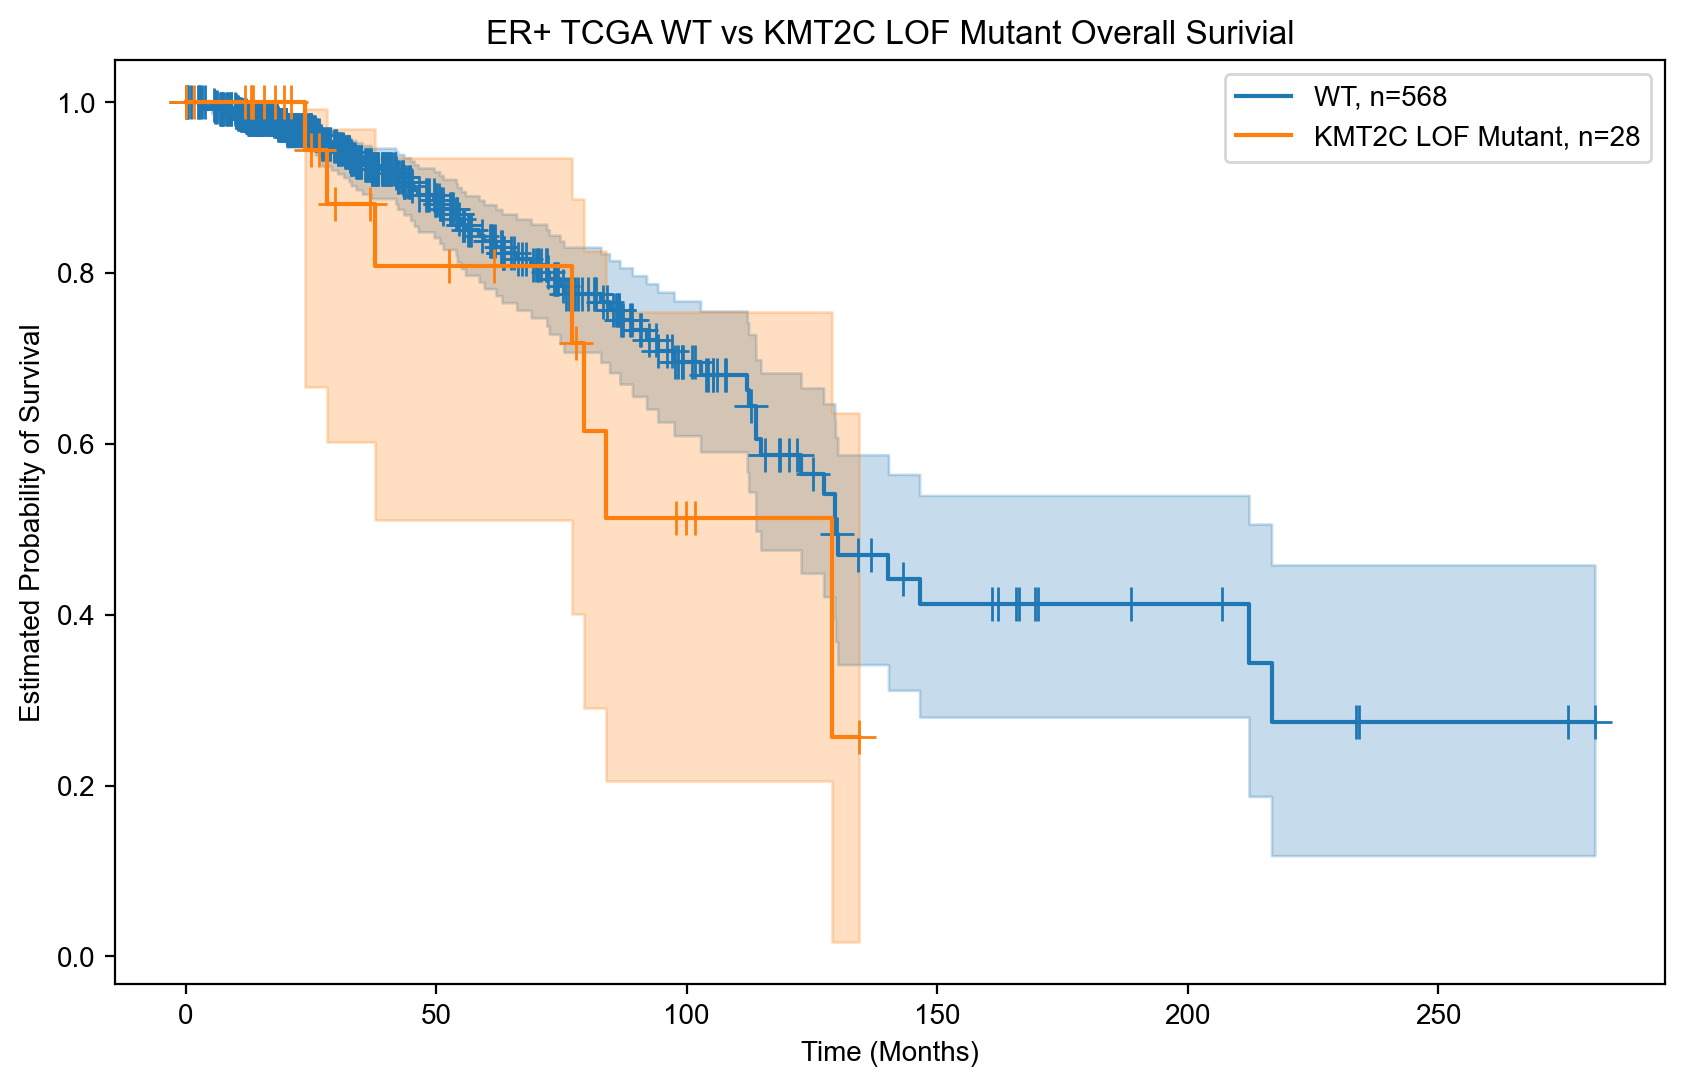

In [56]:

kmf = KaplanMeierFitter()

kmf.fit(overall_survival_WT_kmt2c_nonmissense['OS_MONTHS'],overall_survival_WT_kmt2c_nonmissense['event'], 
        label='WT, n=568')

kmf_kmt2c = KaplanMeierFitter()
kmf_kmt2c.fit(overall_survival_kmt2c_nonmissense['OS_MONTHS'],
              overall_survival_kmt2c_nonmissense['event'],label="KMT2C LOF Mutant, n=28")


plt.figure(figsize=(10,6))
kmf.plot(show_censors=True)
kmf_kmt2c.plot(show_censors=True)

plt.title('ER+ TCGA WT vs KMT2C LOF Mutant Overall Surivial')
plt.xlabel('Time (Months)')
plt.ylabel('Estimated Probability of Survival')

plt.savefig('TCGA_Overall_Surival_KMT2C_LOF_v_WT.svg')
plt.savefig('TCGA_Overall_Surival_KMT2C_LOF_v_WT.png')

In [57]:
results = logrank_test(overall_survival_WT_kmt2c_nonmissense['OS_MONTHS'],overall_survival_kmt2c_nonmissense['OS_MONTHS'], 
                       overall_survival_WT_kmt2c_nonmissense['event'], overall_survival_kmt2c_nonmissense['event'])
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.44 0.23      2.12

## KMT2C missense vs WT

In [49]:
WT_status_list = overall_survival_WT_kmt2c_missense['OS_STATUS'].to_list()

overall_survival_WT_kmt2c_missense['event'] = [0 if i=='0:LIVING' else 1 for i in WT_status_list ]

mut_status_list = overall_survival_kmt2c_missense['OS_STATUS'].to_list()
overall_survival_kmt2c_missense['event'] = [0 if i =='0:LIVING' else 1 for i in mut_status_list ]

/var/folders/sr/b1h9whmj7nz200c0lnkg37sh0000gq/T/ipykernel_89003/905830207.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_survival_WT_kmt2c_missense['event'] = [0 if i=='0:LIVING' else 1 for i in WT_status_list ]
/var/folders/sr/b1h9whmj7nz200c0lnkg37sh0000gq/T/ipykernel_89003/905830207.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_survival_kmt2c_missense['event'] = [0 if i =='0:LIVING' else 1 for i in mut_status_list ]


In [51]:
print(len(overall_survival_WT_kmt2c_missense))
print(len(overall_survival_kmt2c_missense))

588
8


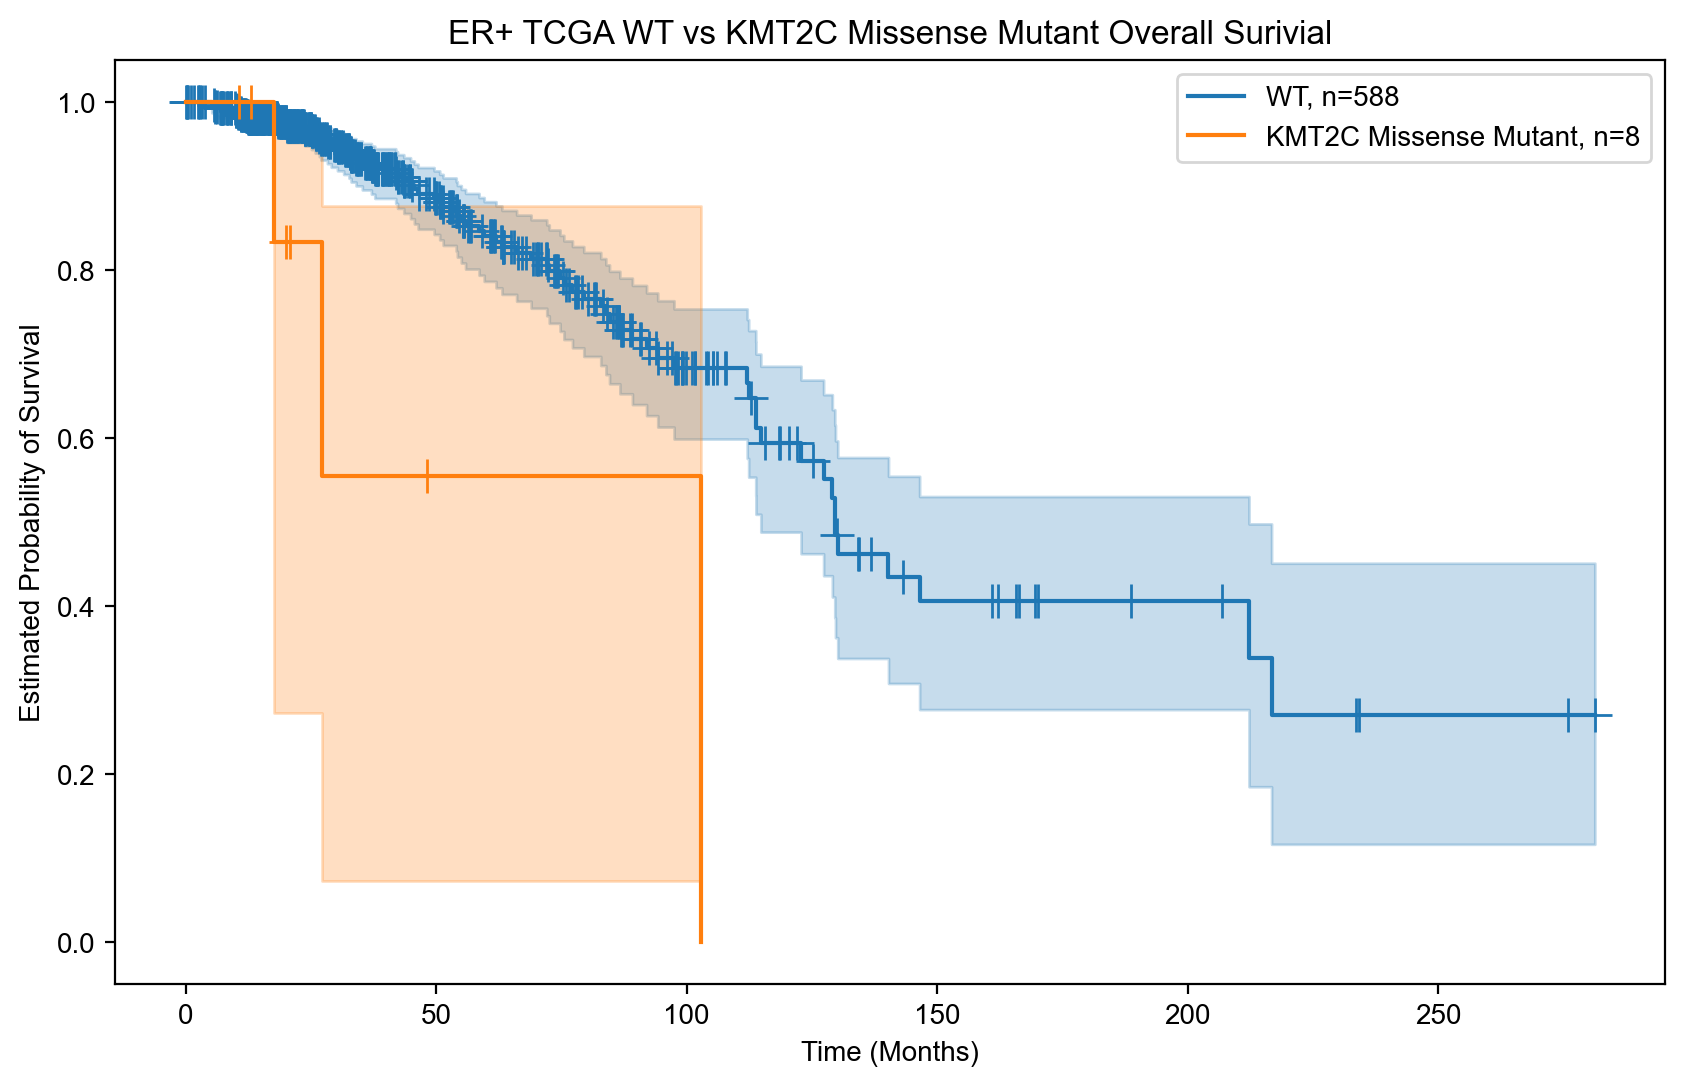

In [52]:

kmf = KaplanMeierFitter()

kmf.fit(overall_survival_WT_kmt2c_missense['OS_MONTHS'],overall_survival_WT_kmt2c_missense['event'], 
        label='WT, n=588')

kmf_kmt2c = KaplanMeierFitter()
kmf_kmt2c.fit(overall_survival_kmt2c_missense['OS_MONTHS'],
              overall_survival_kmt2c_missense['event'],label="KMT2C Missense Mutant, n=8")


plt.figure(figsize=(10,6))
kmf.plot(show_censors=True)
kmf_kmt2c.plot(show_censors=True)

plt.title('ER+ TCGA WT vs KMT2C Missense Mutant Overall Surivial')
plt.xlabel('Time (Months)')
plt.ylabel('Estimated Probability of Survival')

plt.savefig('TCGA_Overall_Surival_Missense_KMT2C_v_WT.svg')
plt.savefig('TCGA_Overall_Surival_Missense_KMT2C_v_WT.png')

In [42]:
overall_survival_kmt2c_missense

,Study ID,Patient ID,OS_STATUS,OS_MONTHS,event
10,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SF,0:LIVING,48.098103,0
13,brca_tcga_pan_can_atlas_2018,TCGA-A1-A0SI,0:LIVING,20.876484,0
65,brca_tcga_pan_can_atlas_2018,TCGA-A2-A0SV,1:DECEASED,27.122990,1
158,brca_tcga_pan_can_atlas_2018,TCGA-A7-A5ZW,0:LIVING,10.717691,0
179,brca_tcga_pan_can_atlas_2018,TCGA-A8-A07E,0:LIVING,19.988822,0
480,brca_tcga_pan_can_atlas_2018,TCGA-B6-A0RP,1:DECEASED,102.771477,1
623,brca_tcga_pan_can_atlas_2018,TCGA-BH-A1EY,1:DECEASED,17.687477,1
705,brca_tcga_pan_can_atlas_2018,TCGA-C8-A3M8,0:LIVING,12.953283,0


In [32]:
results = logrank_test(overall_survival_WT_kmt2c_missense['OS_MONTHS'],overall_survival_kmt2c_missense['OS_MONTHS'], 
                       overall_survival_WT_kmt2c_missense['event'], overall_survival_kmt2c_missense['event'])
results.print_summary()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
           8.03 <0.005      7.77

# TCGA all KMT2C vs WT

In [37]:


overall_survival_kmt2c_all = overall_survival_er[overall_survival_er['Patient ID'].isin(kmt2c_muts_from_mutsig_labels)]
overall_survival_WT_kmt2c_all = overall_survival_er[~overall_survival_er['Patient ID'].isin(kmt2c_muts_from_mutsig_labels)]



In [38]:
WT_status_list = overall_survival_WT_kmt2c_all['OS_STATUS'].to_list()

overall_survival_WT_kmt2c_all['event'] = [0 if i=='0:LIVING' else 1 for i in WT_status_list ]

mut_status_list = overall_survival_kmt2c_all['OS_STATUS'].to_list()
overall_survival_kmt2c_all['event'] = [0 if i =='0:LIVING' else 1 for i in mut_status_list ]

/var/folders/sr/b1h9whmj7nz200c0lnkg37sh0000gq/T/ipykernel_89003/3916376975.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_survival_WT_kmt2c_all['event'] = [0 if i=='0:LIVING' else 1 for i in WT_status_list ]
/var/folders/sr/b1h9whmj7nz200c0lnkg37sh0000gq/T/ipykernel_89003/3916376975.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_survival_kmt2c_all['event'] = [0 if i =='0:LIVING' else 1 for i in mut_status_list ]


In [47]:
print(len(overall_survival_WT_kmt2c_all))
print(len(overall_survival_kmt2c_all))

560
36


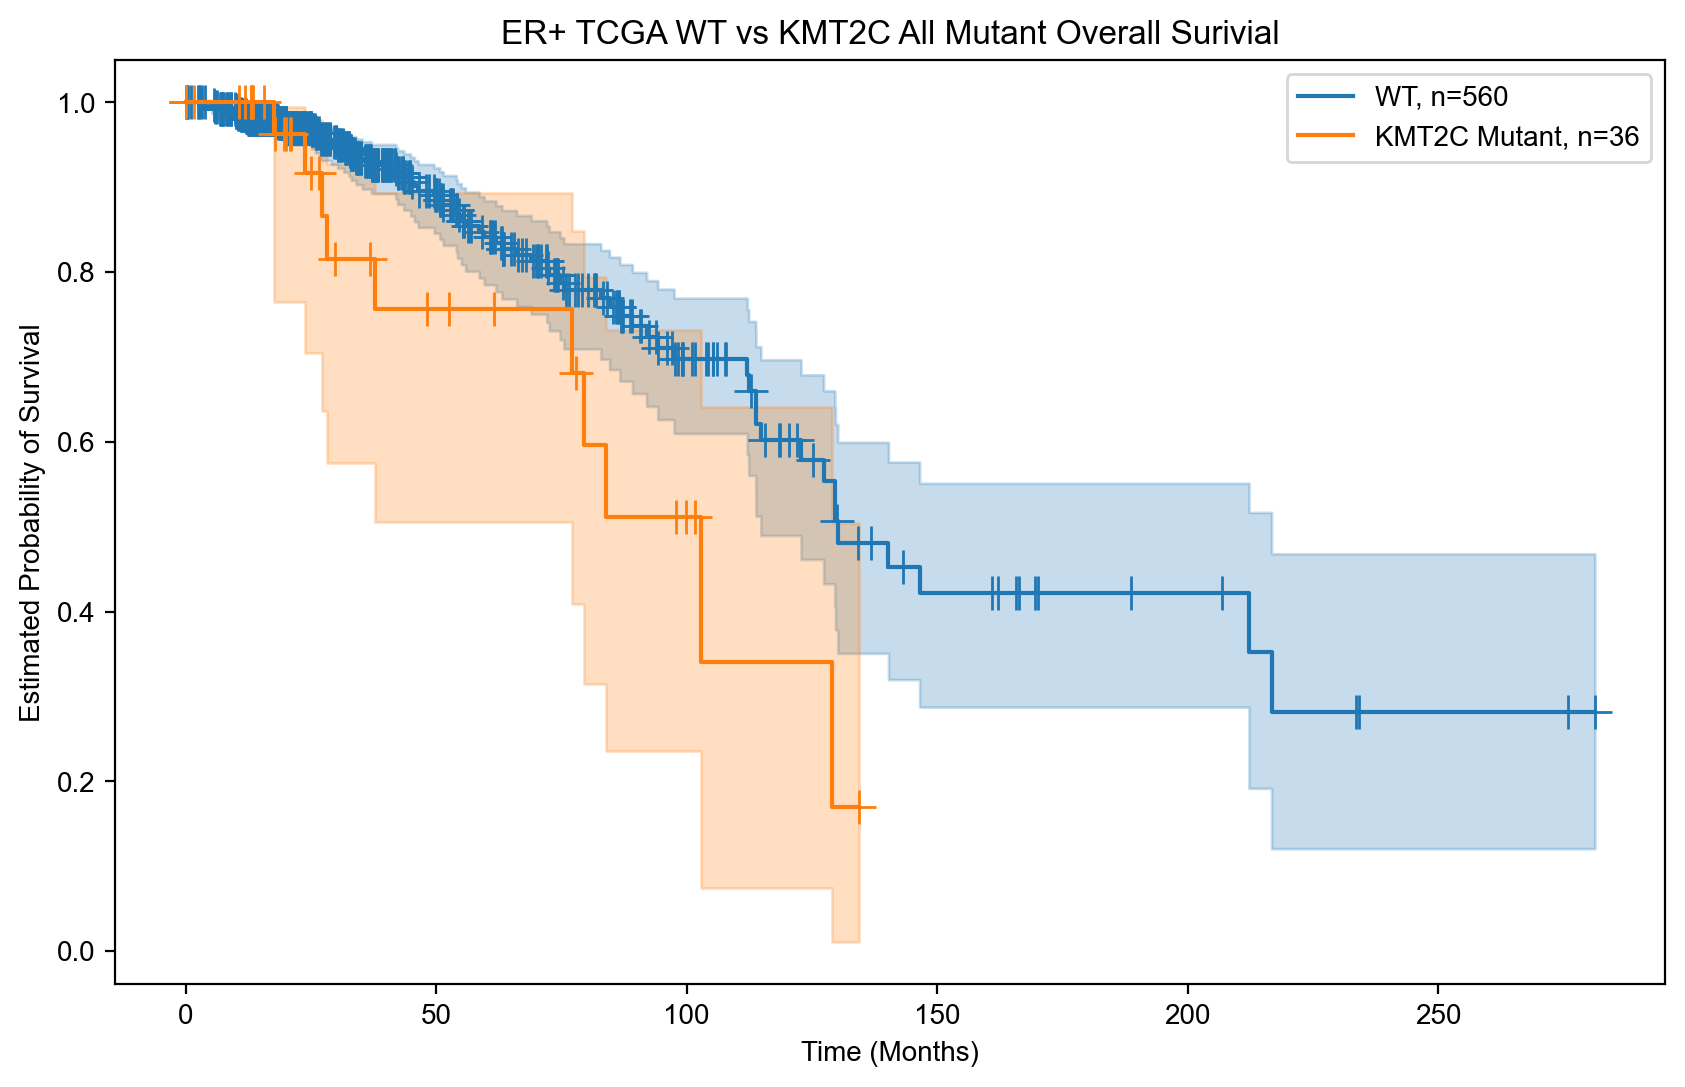

In [48]:

kmf = KaplanMeierFitter()

kmf.fit(overall_survival_WT_kmt2c_all['OS_MONTHS'],overall_survival_WT_kmt2c_all['event'], 
        label='WT, n=560')

kmf_kmt2c = KaplanMeierFitter()
kmf_kmt2c.fit(overall_survival_kmt2c_all['OS_MONTHS'],
              overall_survival_kmt2c_all['event'],label="KMT2C Mutant, n=36")


plt.figure(figsize=(10,6))
kmf.plot(show_censors=True)
kmf_kmt2c.plot(show_censors=True)

plt.title('ER+ TCGA WT vs KMT2C All Mutant Overall Surivial')
plt.xlabel('Time (Months)')
plt.ylabel('Estimated Probability of Survival')

plt.savefig('TCGA_Overall_Surival_All_Mut_KMT2C_v_WT.svg')
plt.savefig('TCGA_Overall_Surival_All_Mut_KMT2C_v_WT.png')

In [40]:
results = logrank_test(overall_survival_WT_kmt2c_all['OS_MONTHS'],overall_survival_kmt2c_all['OS_MONTHS'], 
                       overall_survival_WT_kmt2c_all['event'], overall_survival_kmt2c_all['event'])
results.print_summary()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.76 0.03      5.10

## Silent v WT

In [61]:
kmt2c_muts_from_mutsig = pd.read_csv('/Users/lmartin/Documents/2021/tcga_brca_data/er_pos_all_kmt2c_muts.tsv',sep='\t',index_col=0)
kmt2c_silent_muts_from_mutsig = kmt2c_muts_from_mutsig[kmt2c_muts_from_mutsig['Variant_Classification'] =='Silent']
len(kmt2c_silent_muts_from_mutsig)

kmt2c_silent_muts_from_mutsig

,Tumor_Sample_Barcode,Variant_Classification,Variant_Type,Protein_Change,Reference_Allele,Tumor_Seq_Allele2
39910,TCGA-A8-A0A6,Silent,SNP,p.P3277P,T,G
39911,TCGA-A8-A0A6,Silent,SNP,p.S1883S,T,G
39912,TCGA-A8-A0A6,Silent,SNP,p.P1856P,A,G
39914,TCGA-A8-A0A6,Silent,SNP,p.P1834P,T,G


In [64]:
len(kmt2c_muts_from_mutsig_labels)

49

In [66]:
kmt2c_muts_from_mutsig

,Tumor_Sample_Barcode,Variant_Classification,Variant_Type,Protein_Change,Reference_Allele,Tumor_Seq_Allele2
39889,TCGA-A1-A0SF,Missense_Mutation,SNP,p.L1793F,G,A
39890,TCGA-A1-A0SI,Missense_Mutation,SNP,p.W430C,C,G
39891,TCGA-A2-A0CS,Frame_Shift_Ins,INS,p.I4080fs,-,A
39892,TCGA-A2-A0D3,Frame_Shift_Del,DEL,p.S144fs,G,-
39893,TCGA-A2-A0EM,Frame_Shift_Ins,INS,p.P2436fs,-,G
39894,TCGA-A2-A0EN,Frame_Shift_Del,DEL,p.K3735fs,T,-
39895,TCGA-A2-A0SV,Missense_Mutation,SNP,p.I1381V,T,C
39896,TCGA-A2-A0YT,Frame_Shift_Ins,INS,p.S620fs,-,T
39897,TCGA-A2-A259,Nonsense_Mutation,SNP,p.Q109*,G,A
39899,TCGA-A7-A3RF,Nonsense_Mutation,SNP,p.Q1937*,G,A


In [ ]:
# are there metastatic ER+ cohorts to answer the question of frequency?
# double hit question
# biallelic vs monoallelic loss